In [67]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# 1.讀入Fashion MNIST 數據集

In [68]:
from tensorflow.keras.datasets import fashion_mnist

In [69]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# 2.欣賞數據集內容

In [70]:
class_names = ['T-shirt/top','Trouser','Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

這是 Sneaker


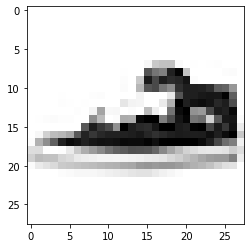

In [71]:
n = 153
print("這是", class_names[y_train[n]])
plt.imshow(x_train[n], cmap = 'Greys')

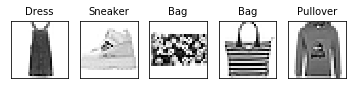

In [72]:
pick = np.random.choice(60000, 5, replace=False)

for i in range(5):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n], cmap = 'Greys')

# 3.資料整理

In [73]:
x_train = x_train/255
x_test = x_test/255

In [74]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [75]:
from tensorflow.keras.utils import to_categorical

In [76]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 打造神經網路

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

#### 改變了神經元的數量，分別為112、69、10，輸入是784維，總共3層

In [78]:
model = Sequential()
model.add(Dense(112, input_dim=784, activation='relu'))
model.add(Dense(69, activation='relu'))
model.add(Dense(10, activation='softmax'))


# 4. 組裝神經網路

In [79]:
model.compile(loss='mse', optimizer=SGD(lr=0.087), metrics=['accuracy'])

In [80]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 112)               87920     
_________________________________________________________________
dense_7 (Dense)              (None, 69)                7797      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                700       
Total params: 96,417
Trainable params: 96,417
Non-trainable params: 0
_________________________________________________________________


# 5.訓練

### 改變了batch_size，做40題檢查一次，改成做30次

In [84]:
train = model.fit(x_train, y_train, batch_size = 40, epochs=30)

Epoch 1/30
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0147 - acc: 0.9032
Epoch 2/30
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0146 - acc: 0.9034
Epoch 3/30
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0145 - acc: 0.9039
Epoch 4/30
60000/60000 [==============================] - 9s 145us/sample - loss: 0.0144 - acc: 0.9054
Epoch 5/30
60000/60000 [==============================] - 11s 175us/sample - loss: 0.0143 - acc: 0.9063
Epoch 6/30
60000/60000 [==============================] - 11s 176us/sample - loss: 0.0143 - acc: 0.9065
Epoch 7/30
60000/60000 [==============================] - 11s 179us/sample - loss: 0.0142 - acc: 0.9072
Epoch 8/30
60000/60000 [==============================] - 11s 177us/sample - loss: 0.0141 - acc: 0.9075
Epoch 9/30
60000/60000 [==============================] - 11s 179us/sample - loss: 0.0140 - acc: 0.9085
Epoch 10/30
60000/60000 [==============================] - 9s 157us/sam

### 正確率:92%

# 6. 訓練成果

In [82]:
result = model.predict_classes(x_test)

神經網路預測是: Sandal


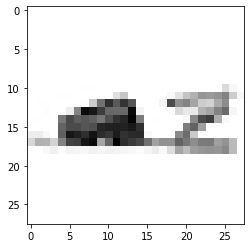

In [83]:
n = 420

print('神經網路預測是:',class_names[result[n]])
plt.imshow(x_test[n].reshape(28, 28), cmap='Greys')